In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#visaualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.5)

#metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt


# Support Vector Machine (SVM) Mixed Dataset
## White = 1, Red = 2
### RBF Kernel

In [2]:
wine = pd.read_csv("winequalityN-updated-2.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


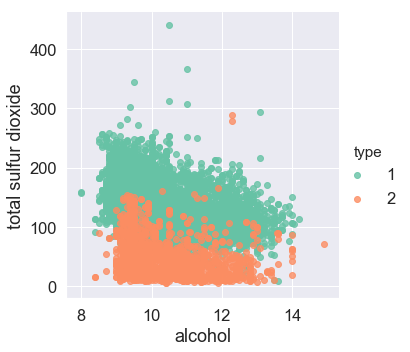

In [3]:
#plotting random two features as a visualization
sns.lmplot ('alcohol', 'total sulfur dioxide', data = wine, hue = 'type', palette = 'Set2', fit_reg = False )

In [4]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

X,y

(      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
 0        1            7.0             0.270         0.36           20.70   
 1        1            6.3             0.300         0.34            1.60   
 2        1            8.1             0.280         0.40            6.90   
 3        1            7.2             0.230         0.32            8.50   
 4        1            7.2             0.230         0.32            8.50   
 5        1            8.1             0.280         0.40            6.90   
 6        1            6.2             0.320         0.16            7.00   
 7        1            7.0             0.270         0.36           20.70   
 8        1            6.3             0.300         0.34            1.60   
 9        1            8.1             0.220         0.43            1.50   
 10       1            8.1             0.270         0.41            1.45   
 11       1            8.6             0.230         0.40            4.20   

In [5]:
#number of labels
u = np.unique(y)
n_classes = len(u)
print(n_classes)

7


In [6]:
#Splitting the dataset as 2/3 of training and 1/3 of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4330, 12)
(2133, 12)
(4330,)
(2133,)


In [7]:
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-0.56934965 -0.01615567  0.30681695 ... -0.34825127 -0.19581046
  -1.50144262]
 [ 1.75638995  0.60222285  2.2080617  ...  0.78062511  2.81196793
   0.01138927]
 [-0.56934965 -0.78912883 -0.53818071 ... -0.1601052   1.14097993
  -0.07265695]
 ...
 [-0.56934965  0.44762822  0.54824486 ... -0.47368197 -1.19840326
   0.68375899]
 [-0.56934965 -0.6345342  -0.96067955 ...  0.21618692 -1.19840326
   0.01138927]
 [-0.56934965 -0.40264225  0.97074369 ...  0.6551944   0.07154762
  -0.74502668]]


C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\PackardBELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [8]:
#finding the hyperparameters for SVM using 3 fold cross validation
y = y.values.reshape(-1,1)
y = np.asarray(y, dtype = int)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3) #searching for parameters using 3-fold cross validation
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
list1 = list(grid_search.best_params_.values()) #converting dictionary to list
print(list1)
C_best = list1[0] #storing C parameter calculated using gridsearch
gamma_best = list1[1] #storing gamma parameter calculated using gridsearch
print(C_best)
print(gamma_best)

{'C': 10, 'gamma': 1}
[10, 1]
10
1


In [9]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transformation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
print(y_train)
print(y_test)
print(y_test.shape)
print(y_train.shape)

[[5]
 [6]
 [5]
 ...
 [6]
 [6]
 [5]]
[[6]
 [6]
 [6]
 ...
 [7]
 [5]
 [5]]
(2133, 1)
(4330, 1)


In [10]:
#fitting the model
model = svm.SVC(C = C_best, gamma = gamma_best,kernel='rbf')
model.fit(X_train, y_train)


C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
#finding the predicted values
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[6 6 6 ... 7 6 6]
[[6]
 [6]
 [6]
 ...
 [7]
 [5]
 [5]]


In [12]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

rms = sqrt(mean_squared_error(y_test, y_pred)) #root mean square error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
print(rms)
print(mae)

[[  0   0   2   9   0   0]
 [  0   8  23  31   3   0]
 [  0   5 480 243   7   0]
 [  0   4 149 686  62   2]
 [  0   2  28 133 173   6]
 [  0   0   3  29  23  22]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        11
           4       0.42      0.12      0.19        65
           5       0.70      0.65      0.68       735
           6       0.61      0.76      0.67       903
           7       0.65      0.51      0.57       342
           8       0.73      0.29      0.41        77

   micro avg       0.64      0.64      0.64      2133
   macro avg       0.52      0.39      0.42      2133
weighted avg       0.64      0.64      0.63      2133

0.6418190342240975
0.7528660662048441
0.42240975152367555


C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
cm = confusion_matrix(y_test,y_pred)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print(FP)
print(FN)
print(TP)
print(TN)

[  0  11 205 445  95   8]
[ 11  57 255 217 169  55]
[  0   8 480 686 173  22]
[2122 2057 1193  785 1696 2048]


In [14]:
print(model.support_vectors_) #support vectors
print(model.support_) #support vector indices
print(model.support_vectors_.shape)
print(model.n_support_) # number of support vectors for each classes

[[-0.56934965 -0.40264225 -0.53818071 ...  2.09764755  0.67310329
  -0.91311911]
 [ 1.75638995 -0.32534494  2.87198843 ...  0.6551944  -0.12897094
  -0.57693425]
 [ 1.75638995 -0.09345299  3.23413029 ...  1.15691724 -0.06213142
  -0.24074938]
 ...
 [-0.56934965  1.45249333 -0.41746676 ... -0.09738985 -0.46316854
  -0.07265695]
 [-0.56934965 -0.09345299 -0.47782374 ...  0.96877118 -0.73052662
   2.02849845]
 [-0.56934965  0.13843896 -0.59853769 ...  0.40433299 -0.3294895
   1.69231358]]
[  80  321  484 ... 2063 2202 2434]
(3829, 12)
[  19  143 1213 1682  662  105    5]


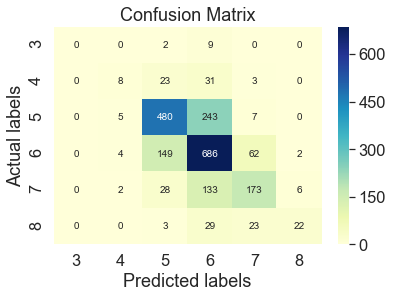

In [15]:
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd', cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['3', '4','5','6','7','8','9']); ax.yaxis.set_ticklabels(['3', '4','5','6','7','8','9']);

# Support Vector Machine (SVM) Mixed Dataset
## White = 2, Red = 1
### RBF Kernel

In [16]:
wine = pd.read_csv("winequalityN-updated-2-flipped.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


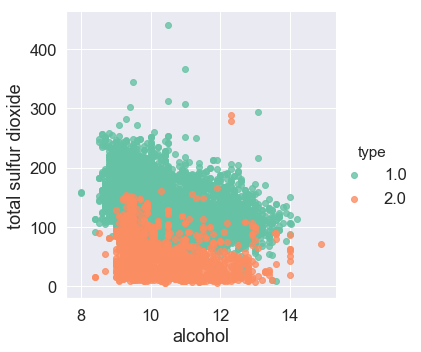

In [17]:
#plotting random two features as a visualization
sns.lmplot ('alcohol', 'total sulfur dioxide', data = wine, hue = 'type', palette = 'Set2', fit_reg = False )

In [18]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

X,y

(      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
 0      1.0            7.0             0.270         0.36           20.70   
 1      1.0            6.3             0.300         0.34            1.60   
 2      1.0            8.1             0.280         0.40            6.90   
 3      1.0            7.2             0.230         0.32            8.50   
 4      1.0            7.2             0.230         0.32            8.50   
 5      1.0            8.1             0.280         0.40            6.90   
 6      1.0            6.2             0.320         0.16            7.00   
 7      1.0            7.0             0.270         0.36           20.70   
 8      1.0            6.3             0.300         0.34            1.60   
 9      1.0            8.1             0.220         0.43            1.50   
 10     1.0            8.1             0.270         0.41            1.45   
 11     1.0            8.6             0.230         0.40            4.20   

In [19]:
#Splitting the dataset as 2/3 of training and 1/3 of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4330, 12)
(2134, 12)
(4330,)
(2134,)


In [20]:
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[ 1.7552936   1.6341593  -0.11161862 ...  0.40402967  1.75607443
   0.18196053]
 [-0.56970526 -0.79518963 -0.53830049 ... -0.16207381  1.15112569
  -0.0708264 ]
 [-0.56970526  0.53703398 -1.33070967 ... -0.2249742  -0.3948544
   0.09769822]
 ...
 [-0.56970526  0.45866788  0.55888145 ... -0.47657575 -1.20145271
   0.68753439]
 [-0.56970526 -0.63845744 -0.96498235 ...  0.21532851 -1.20145271
   0.01343591]
 [-0.56970526 -0.40335916  0.98556331 ...  0.65563122  0.07566128
  -0.74492487]]


In [21]:
#finding the hyperparameters for SVM using 3 fold cross validation
y = y.values.reshape(-1,1)
y = np.asarray(y, dtype = int)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3) #searching for parameters using 3-fold cross validation
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
list2 = list(grid_search.best_params_.values()) #converting dictionary to list
print(list2)
C_best = list2[0] #storing C parameter calculated using gridsearch
gamma_best = list2[1] #storing gamma parameter calculated using gridsearch
print(C_best)
print(gamma_best)

{'C': 10, 'gamma': 1}
[10, 1]
10
1


In [22]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transofmation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
print(y_train)
print(y_test)
print(y_test.shape)
print(y_train.shape)

[[5]
 [5]
 [6]
 ...
 [6]
 [6]
 [5]]
[[6]
 [6]
 [6]
 ...
 [5]
 [5]
 [5]]
(2134, 1)
(4330, 1)


In [23]:
#fitting the model
model = svm.SVC(C = C_best, gamma = gamma_best ,kernel='rbf')
model.fit(X_train, y_train)

C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
#finding the predicted values
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[6 6 6 ... 6 6 5]
[[6]
 [6]
 [6]
 ...
 [5]
 [5]
 [5]]


In [25]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

rms = sqrt(mean_squared_error(y_test, y_pred)) #root mean square error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
print(rms)
print(mae)

[[  0   0   4   8   0   0]
 [  0   8  20  34   3   0]
 [  0   5 474 241   8   0]
 [  0   4 151 691  64   2]
 [  0   2  28 128 173   6]
 [  0   0   3  33  23  21]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       0.42      0.12      0.19        65
           5       0.70      0.65      0.67       728
           6       0.61      0.76      0.68       912
           7       0.64      0.51      0.57       337
           8       0.72      0.26      0.39        80

   micro avg       0.64      0.64      0.64      2134
   macro avg       0.51      0.38      0.42      2134
weighted avg       0.64      0.64      0.63      2134

0.64058106841612
0.7604319790432542
0.42736644798500467


C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
print(model.support_vectors_) #support vectors
print(model.support_) #support vector indices
print(model.support_vectors_.shape)
print(model.n_support_) # number of support vectors for each classes

[[-0.56970526 -0.40335916 -0.53830049 ...  2.10234012  0.68061001
  -0.91344949]
 [ 1.7552936  -0.32499306  2.90563171 ...  0.65563122 -0.1259883
  -0.57640025]
 [ 1.7552936   3.43657947  1.47319973 ...  0.21532851  0.27731086
  -1.25049873]
 ...
 [-0.56970526  1.47742711 -0.41639139 ... -0.09917343 -0.46207093
  -0.0708264 ]
 [-0.56970526 -0.08989478 -0.47734594 ...  0.97013315 -0.73093703
   2.03573134]
 [-0.56970526  0.1452035  -0.59925504 ...  0.40402967 -0.32763787
   1.6986821 ]]
[  79  320  346 ... 2062 2201 2433]
(3825, 12)
[  18  143 1216 1673  667  103    5]


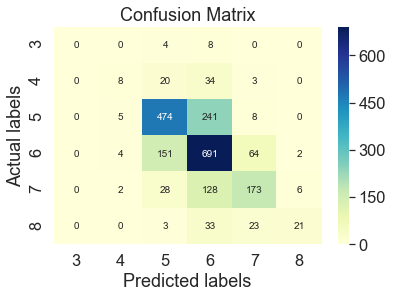

In [27]:
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd', cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['3', '4','5','6','7','8','9']); ax.yaxis.set_ticklabels(['3', '4','5','6','7','8','9']);

# Support Vector Machine (SVM) White Wine Dataset
## RBF Kernel


In [28]:
wine = pd.read_csv("winequalityN-white.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


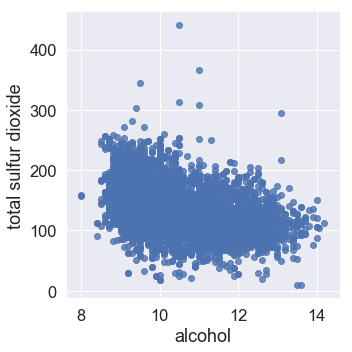

In [29]:
#plotting random two features as a visualization
sns.lmplot ('alcohol', 'total sulfur dioxide', data = wine, palette = 'Set2', fit_reg = False )


In [30]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

X,y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.0             0.270         0.36           20.70      0.045   
 1               6.3             0.300         0.34            1.60      0.049   
 2               8.1             0.280         0.40            6.90      0.050   
 3               7.2             0.230         0.32            8.50      0.058   
 4               7.2             0.230         0.32            8.50      0.058   
 5               8.1             0.280         0.40            6.90      0.050   
 6               6.2             0.320         0.16            7.00      0.045   
 7               7.0             0.270         0.36           20.70      0.045   
 8               6.3             0.300         0.34            1.60      0.049   
 9               8.1             0.220         0.43            1.50      0.044   
 10              8.1             0.270         0.41            1.45      0.033   
 11             

In [32]:
#Splitting the dataset as 2/3 of training and 1/3 of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3262, 11)
(1608, 11)
(3262,)
(1608,)


In [33]:
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[ 1.23716224  2.23080394  0.21406023 ... -0.64949443  0.39680672
  -0.66143178]
 [-0.065798   -0.48713097 -0.11303403 ...  0.6900673   0.48579837
   1.60308146]
 [-0.65805266  0.09528365 -0.35835473 ... -0.11366974 -1.11605129
   1.84570788]
 ...
 [ 1.11871131  1.45425111  1.27711659 ... -0.314604   -1.20504294
   0.63257578]
 [-0.53960173 -0.97247649 -0.44012829 ...  0.42215495 -1.20504294
  -0.014428  ]
 [-0.18424893  2.13373483  0.37760736 ...  0.89100156  0.48579837
  -0.74230726]]


In [34]:
#finding the hyperparameters for SVM using 3 fold cross validation
y = y.values.reshape(-1,1)
y = np.asarray(y, dtype = int)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3) #searching for parameters using 3-fold cross validation
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
list3 = list(grid_search.best_params_.values()) #converting dictionary to list
print(list3)
C_best = list3[0] #storing C parameter calculated using gridsearch
gamma_best = list3[1] #storing gamma parameter calculated using gridsearch
print(C_best)
print(gamma_best)

{'C': 10, 'gamma': 1}
[10, 1]
10
1


In [35]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transofmation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
print(y_train)
print(y_test)
print(y_test.shape)
print(y_train.shape)

[[5]
 [6]
 [7]
 ...
 [6]
 [6]
 [5]]
[[6]
 [5]
 [8]
 ...
 [6]
 [6]
 [7]]
(1608, 1)
(3262, 1)


In [36]:
#fitting the model
model = svm.SVC(C = C_best, gamma = gamma_best, kernel='rbf')
model.fit(X_train, y_train)

C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
#finding the predicted values
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[6 5 7 ... 5 6 7]
[[6]
 [5]
 [8]
 ...
 [6]
 [6]
 [7]]


In [38]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

rms = sqrt(mean_squared_error(y_test, y_pred)) #root mean square error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
print(rms)
print(mae)

[[  0   0   1   7   0   0   0]
 [  0   8  12  27   0   0   0]
 [  0   1 281 198   5   0   0]
 [  0   4  93 558  47   1   0]
 [  0   0  15 138 137   3   0]
 [  0   0   1  27  18  24   0]
 [  0   0   0   1   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.62      0.17      0.27        47
           5       0.70      0.58      0.63       485
           6       0.58      0.79      0.67       703
           7       0.66      0.47      0.55       293
           8       0.86      0.34      0.49        70
           9       0.00      0.00      0.00         2

   micro avg       0.63      0.63      0.63      1608
   macro avg       0.49      0.34      0.37      1608
weighted avg       0.64      0.63      0.61      1608

0.6268656716417911
0.7543406728702017
0.43470149253731344


C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
print(model.support_vectors_) #support vectors
print(model.support_) #support vector indices
print(model.support_vectors_.shape)
print(model.n_support_) # number of support vectors for each classes

[[ 1.71096596  0.48356007  0.70470163 ...  0.08726452 -1.47201788
   1.52220599]
 [ 1.94786783 -0.19592366 -1.01254325 ... -1.11834103  0.12983178
  -0.58055631]
 [-0.77650359 -0.48713097  0.13228667 ...  1.22589199 -0.49310976
   0.38994937]
 ...
 [ 2.65857341 -0.09885456  0.95002232 ...  0.08726452 -0.22613482
  -0.09530347]
 [ 0.28955479 -0.19592366  1.27711659 ...  1.22589199 -0.58210141
   1.92658335]
 [ 0.64490758 -0.39006187  0.21406023 ...  0.62308921 -0.04815152
   1.60308146]]
[  51  238  457 ...  851 1011 1308]
(2837, 11)
[  12  110  816 1287  511   98    3]


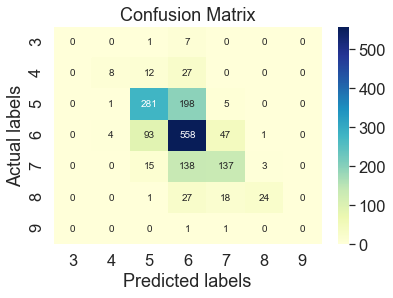

In [40]:
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd', cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['3', '4','5','6','7','8','9']); ax.yaxis.set_ticklabels(['3', '4','5','6','7','8','9']);

# Support Vector Machine (SVM) Red Wine Dataset
## RBF Kernel


In [41]:
wine = pd.read_csv("winequalityN-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


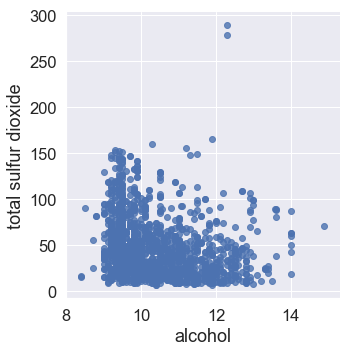

In [42]:
#plotting random two features as a visualization
sns.lmplot ('alcohol', 'total sulfur dioxide', data = wine, palette = 'Set2', fit_reg = False )

In [43]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

X,y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 5               7.4             0.660         0.00             1.8      0.075   
 6               7.9             0.600         0.06             1.6      0.069   
 7               7.3             0.650         0.00             1.2      0.065   
 8               7.8             0.580         0.02             2.0      0.073   
 9               7.5             0.500         0.36             6.1      0.071   
 10              6.7             0.580         0.08             1.8      0.097   
 11             

In [44]:
#Splitting the dataset as 2/3 of training and 1/3 of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1067, 11)
(526, 11)
(1067,)
(526,)


In [45]:
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-0.27114458  0.59878201 -1.36458159 ... -0.02674119 -0.1527553
   0.52106712]
 [-0.73608836  0.15865429 -0.48954552 ...  0.81819524  0.14060306
   0.10515759]
 [-0.8523243   0.48875008 -0.95279991 ...  0.68820502  0.96200648
  -0.86529799]
 ...
 [ 1.87922039 -1.93195238  1.26052664 ... -0.22172652  1.84208156
  -0.31075194]
 [ 1.29804067 -1.38179273  1.26052664 ... -0.7416874   1.37270818
  -0.95772233]
 [-0.4454985   0.21367025 -1.26163617 ...  0.29823436 -0.21142697
   0.33621844]]


In [46]:
#finding the hyperparameters for SVM using 3 fold cross validation
y = y.values.reshape(-1,1)
y = np.asarray(y, dtype = int)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=3) #searching for parameters using 3-fold cross validation
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
list4 = list(grid_search.best_params_.values()) #converting dictionary to list
print(list4)
C_best = list4[0] #storing C parameter calculated using gridsearch
gamma_best = list4[1] #storing gamma parameter calculated using gridsearch
print(C_best)
print(gamma_best)

{'C': 10, 'gamma': 0.1}
[10, 0.1]
10
0.1


In [47]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transofmation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
print(y_train)
print(y_test)
print(y_test.shape)
print(y_train.shape)

[[5]
 [7]
 [6]
 ...
 [6]
 [6]
 [6]]
[[5]
 [3]
 [6]
 [6]
 [6]
 [5]
 [6]
 [5]
 [6]
 [5]
 [6]
 [5]
 [6]
 [5]
 [5]
 [7]
 [7]
 [5]
 [7]
 [7]
 [5]
 [6]
 [5]
 [6]
 [6]
 [6]
 [5]
 [5]
 [5]
 [5]
 [6]
 [5]
 [6]
 [3]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [5]
 [5]
 [6]
 [4]
 [6]
 [6]
 [6]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [5]
 [6]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [6]
 [7]
 [7]
 [4]
 [5]
 [6]
 [5]
 [6]
 [7]
 [6]
 [5]
 [5]
 [7]
 [5]
 [5]
 [6]
 [5]
 [6]
 [5]
 [6]
 [6]
 [5]
 [7]
 [6]
 [6]
 [5]
 [6]
 [6]
 [7]
 [5]
 [6]
 [6]
 [7]
 [6]
 [7]
 [5]
 [6]
 [5]
 [7]
 [6]
 [6]
 [5]
 [5]
 [6]
 [5]
 [6]
 [7]
 [6]
 [5]
 [6]
 [5]
 [6]
 [6]
 [6]
 [5]
 [6]
 [5]
 [5]
 [6]
 [5]
 [5]
 [6]
 [6]
 [6]
 [7]
 [6]
 [5]
 [6]
 [5]
 [7]
 [7]
 [5]
 [6]
 [7]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [7]
 [6]
 [6]
 [7]
 [5]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [5]
 [5]
 [6]
 [6]
 [7]
 [6]
 [7]
 [5]
 [5]
 [6]
 [6]
 [4]
 [7]
 [6]
 [7]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]
 [5]
 [5]
 [5]
 [6]
 [5]
 [5]
 [5]
 [6]
 [6]
 [5]
 [5]
 [6]
 [6]

In [48]:
#fitting the model
model = svm.SVC(C = C_best, gamma = gamma_best,kernel='rbf')
model.fit(X_train, y_train)

C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
#finding the predicted values
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[5 5 6 6 6 5 6 6 5 6 6 5 7 5 5 7 7 5 6 6 6 5 6 6 6 6 5 5 6 5 5 5 6 5 6 5 5
 5 6 6 6 6 6 5 5 6 6 6 5 6 5 5 5 6 6 6 5 5 5 5 5 5 5 5 6 6 6 5 5 6 5 5 7 6
 5 5 6 6 5 5 5 7 6 5 6 6 6 6 6 6 6 6 7 5 6 6 6 6 6 5 6 5 6 6 6 5 5 5 5 5 7
 6 5 5 6 6 6 6 5 6 5 6 6 5 5 5 6 5 7 5 5 6 5 7 7 6 6 7 6 5 5 5 5 6 6 6 3 6
 7 4 6 6 5 5 5 5 5 6 6 5 6 6 5 7 6 6 5 5 6 6 5 7 6 5 5 5 6 6 5 6 6 6 5 6 6
 5 5 6 6 5 5 6 6 5 5 8 7 7 6 6 5 6 5 7 5 6 6 5 6 5 6 5 5 6 6 6 5 6 6 6 6 6
 5 5 6 6 6 6 7 5 5 5 6 6 5 5 5 7 5 5 5 5 6 6 5 6 6 5 6 6 5 5 6 5 6 6 6 5 6
 5 5 5 6 5 6 6 5 5 6 5 6 5 4 4 6 7 6 6 6 6 5 6 6 5 7 5 5 5 5 6 6 7 6 5 6 6
 6 5 5 5 6 6 6 7 5 6 7 6 7 6 5 5 5 6 6 5 4 6 7 5 6 6 6 5 5 5 6 5 5 5 7 5 5
 6 5 6 5 4 6 5 7 7 5 6 6 7 6 5 5 6 5 6 5 5 5 5 5 6 5 5 5 5 6 6 6 6 6 6 6 6
 5 7 6 5 6 5 6 7 5 5 5 6 6 5 7 5 6 6 7 5 6 4 5 6 6 5 5 5 6 6 7 6 7 5 6 6 6
 6 6 6 5 5 6 6 5 6 6 6 6 6 5 5 6 5 6 6 5 6 5 6 6 6 6 5 5 6 6 5 6 6 6 7 7 6
 6 5 5 5 5 5 5 5 5 5 6 4 5 5 5 4 7 5 5 5 3 5 6 6 5 6 6 6 4 5 6 5 5 5 5 6 5
 6 5 5 7 6 7 6 5 4 6 5 5 

In [50]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

rms = sqrt(mean_squared_error(y_test, y_pred)) #root mean square error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
print(rms)
print(mae)

[[  0   0   3   1   0   0]
 [  0   0  10   4   0   0]
 [  1   2 155  61   1   0]
 [  1   7  60 135  14   1]
 [  0   2   3  34  27   0]
 [  0   0   1   3   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.67      0.70      0.69       220
           6       0.57      0.62      0.59       218
           7       0.64      0.41      0.50        66
           8       0.00      0.00      0.00         4

   micro avg       0.60      0.60      0.60       526
   macro avg       0.31      0.29      0.30       526
weighted avg       0.60      0.60      0.59       526

0.6026615969581749
0.7775363256096692
0.4600760456273764


In [51]:
print(model.support_vectors_) #support vectors
print(model.support_) #support vector indices
print(model.support_vectors_.shape)
print(model.n_support_) # number of support vectors for each classes

[[ 1.2399227  -0.50153729  0.79727225 ...  0.42822458  1.19669317
  -0.49560062]
 [-0.50361647  3.59715209 -1.36458159 ...  2.05310233 -0.68080035
   0.2437941 ]
 [-0.56173444  2.46932481 -1.10721804 ... -0.02674119 -0.62212868
  -0.68044931]
 ...
 [-0.21302661  0.04862236  0.38549056 ... -0.7416874   0.37528975
   2.46197828]
 [-1.60785794 -0.22645747 -1.21016346 ...  1.2081659   0.96200648
   3.29379735]
 [-0.27114458  0.21367025 -0.9013272  ...  0.94818546  0.4926331
   2.09228092]]
[ 149  222  350  373  812  882   66   80  133  166  172  182  219  267
  351  370  381  393  410  430  483  505  527  541  631  666  735  744
  757  758  781  849  863  889  895  899  908  914  926  934  959  983
 1025 1037    0    5    7    8   14   24   25   29   32   33   36   40
   43   44   45   46   48   55   57   64   72   73   84   85   87   97
  100  104  119  121  122  127  129  130  131  134  136  139  142  144
  148  150  151  152  154  159  161  162  165  167  168  169  170  183
  185  189  

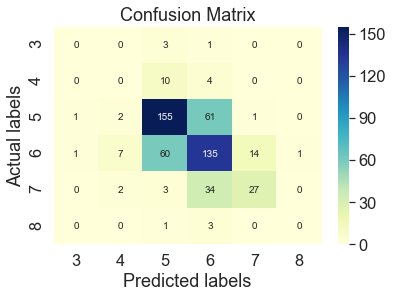

In [52]:
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd', cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['3', '4','5','6','7','8','9']); ax.yaxis.set_ticklabels(['3', '4','5','6','7','8','9']);

# Comparing Kernel Functions
## Linear Kernel for Mixed Dataset 
### White = 1 Red = 2

In [53]:
wine = pd.read_csv("winequalityN-updated-2.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [54]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

#X,y

In [55]:
#Splitting the dataset as 2/3 of training and 1/3 of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)


In [56]:
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train)

C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\PackardBELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [57]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transformation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
#print(y_train)
#print(y_test)
#print(y_test.shape)
#print(y_train.shape)

In [58]:
#fitting the model
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)


C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [59]:
#finding the predicted values
y_pred = model.predict(X_test)
#print(y_pred)
#print(y_test)

In [60]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

rms = sqrt(mean_squared_error(y_test, y_pred)) #root mean square error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
print(rms)
print(mae)

[[  0   0   6   5   0   0]
 [  0   0  42  23   0   0]
 [  0   0 422 313   0   0]
 [  0   0 184 719   0   0]
 [  0   0  17 325   0   0]
 [  0   0   0  77   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        65
           5       0.63      0.57      0.60       735
           6       0.49      0.80      0.61       903
           7       0.00      0.00      0.00       342
           8       0.00      0.00      0.00        77

   micro avg       0.53      0.53      0.53      2133
   macro avg       0.19      0.23      0.20      2133
weighted avg       0.42      0.53      0.46      2133

0.5349273323956868
0.8104451729391481
0.5274261603375527


C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
cm = confusion_matrix(y_test,y_pred)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print(FP)
print(FN)
print(TP)
print(TN)

[  0   0 249 743   0   0]
[ 11  65 313 184 342  77]
[  0   0 422 719   0   0]
[2122 2068 1149  487 1791 2056]


In [62]:
#print(model.support_vectors_) #support vectors
#print(model.support_) #support vector indices
#print(model.support_vectors_.shape)
print(model.n_support_) # number of support vectors for each classes

[  19  149 1211 1741  732  115    5]


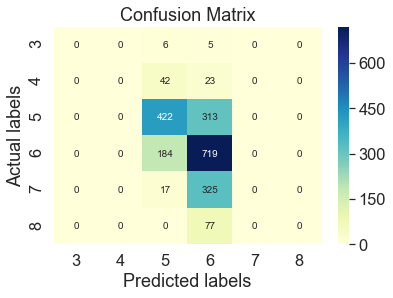

In [63]:
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd', cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['3', '4','5','6','7','8','9']); ax.yaxis.set_ticklabels(['3', '4','5','6','7','8','9']);

## Linear Kernel for White Wine 

In [64]:
wine = pd.read_csv("winequalityN-white.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [65]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

#X,y

In [66]:
#Splitting the dataset as 2/3 of training and 1/3 of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)


In [67]:
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train)

In [68]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transofmation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
#print(y_train)
#print(y_test)
#print(y_test.shape)
#print(y_train.shape)

In [69]:
#fitting the model
model = svm.SVC( kernel='linear')
model.fit(X_train, y_train)

C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [70]:
#finding the predicted values
y_pred = model.predict(X_test)
#print(y_pred)
#print(y_test)

In [71]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

rms = sqrt(mean_squared_error(y_test, y_pred)) #root mean square error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
print(rms)
print(mae)

[[  0   0   5   3   0   0   0]
 [  0   0  29  18   0   0   0]
 [  0   0 235 250   0   0   0]
 [  0   0 119 584   0   0   0]
 [  0   0  11 282   0   0   0]
 [  0   0   1  69   0   0   0]
 [  0   0   0   2   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        47
           5       0.59      0.48      0.53       485
           6       0.48      0.83      0.61       703
           7       0.00      0.00      0.00       293
           8       0.00      0.00      0.00        70
           9       0.00      0.00      0.00         2

   micro avg       0.51      0.51      0.51      1608
   macro avg       0.15      0.19      0.16      1608
weighted avg       0.39      0.51      0.43      1608

0.5093283582089553
0.8442076564235717
0.5621890547263682


C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
#print(model.support_vectors_) #support vectors
#print(model.support_) #support vector indices
#print(model.support_vectors_.shape)
print(model.n_support_) # number of support vectors for each classes

[  12  115  890 1314  582  104    3]


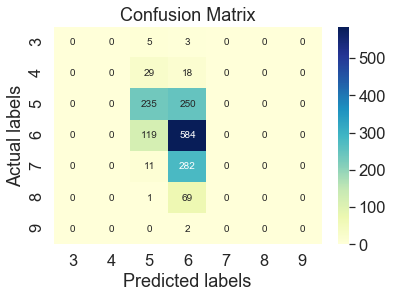

In [73]:
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd', cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['3', '4','5','6','7','8','9']); ax.yaxis.set_ticklabels(['3', '4','5','6','7','8','9']);

## Linear Kernel for Red Wine

In [74]:
wine = pd.read_csv("winequalityN-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [75]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

#X,y

In [76]:
#Splitting the dataset as 2/3 of training and 1/3 of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)


In [77]:
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train)

In [78]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transofmation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
#print(y_train)
#print(y_test)
#print(y_test.shape)
#print(y_train.shape)

In [79]:
#fitting the model
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [80]:
#finding the predicted values
y_pred = model.predict(X_test)
#print(y_pred)
#print(y_test)

In [81]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

rms = sqrt(mean_squared_error(y_test, y_pred)) #root mean square error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
print(rms)
print(mae)

[[  0   0   4   0   0   0]
 [  0   0  10   4   0   0]
 [  1   0 168  51   0   0]
 [  0   0  82 136   0   0]
 [  0   0   4  62   0   0]
 [  0   0   0   4   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.63      0.76      0.69       220
           6       0.53      0.62      0.57       218
           7       0.00      0.00      0.00        66
           8       0.00      0.00      0.00         4

   micro avg       0.58      0.58      0.58       526
   macro avg       0.19      0.23      0.21       526
weighted avg       0.48      0.58      0.53       526

0.5779467680608364
0.7204244629689545
0.4543726235741445


C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
#print(model.support_vectors_) #support vectors
#print(model.support_) #support vector indices
#print(model.support_vectors_.shape)
print(model.n_support_) # number of support vectors for each classes

[  6  38 315 397 133  14]


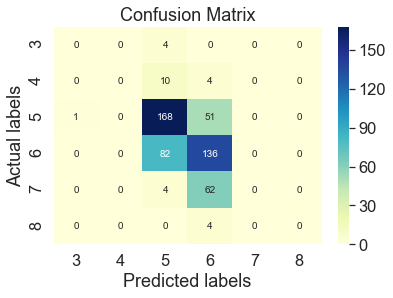

In [83]:
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd', cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['3', '4','5','6','7','8','9']); ax.yaxis.set_ticklabels(['3', '4','5','6','7','8','9']);

## Polynomial Kernel for Mixed Dataset

In [84]:
wine = pd.read_csv("winequalityN-updated-2.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [85]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

#X,y

In [86]:
#Splitting the dataset as 2/3 of training and 1/3 of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)


In [87]:
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train)

C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\PackardBELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [88]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transformation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
#print(y_train)
#print(y_test)
#print(y_test.shape)
#print(y_train.shape)

In [89]:
#fitting the model
model = svm.SVC(kernel='poly')
model.fit(X_train, y_train)


C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [90]:
#finding the predicted values
y_pred = model.predict(X_test)
#print(y_pred)
#print(y_test)

In [91]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

rms = sqrt(mean_squared_error(y_test, y_pred)) #root mean square error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
print(rms)
print(mae)

[[  0   0   8   3   0   0]
 [  1   0  29  34   1   0]
 [  1   1 355 376   1   1]
 [  1   0 128 745  29   0]
 [  0   0  10 273  59   0]
 [  0   0   1  60  16   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        65
           5       0.67      0.48      0.56       735
           6       0.50      0.83      0.62       903
           7       0.56      0.17      0.26       342
           8       0.00      0.00      0.00        77

   micro avg       0.54      0.54      0.54      2133
   macro avg       0.29      0.25      0.24      2133
weighted avg       0.53      0.54      0.50      2133

0.5433661509610876
0.8020134063623859
0.516643225503985


In [92]:
cm = confusion_matrix(y_test,y_pred)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print(FP)
print(FN)
print(TP)
print(TN)

[  3   1 176 746  47   1]
[ 11  65 380 158 283  77]
[  0   0 355 745  59   0]
[2119 2067 1222  484 1744 2055]


In [93]:
#print(model.support_vectors_) #support vectors
#print(model.support_) #support vector indices
#print(model.support_vectors_.shape)
print(model.n_support_) # number of support vectors for each classes

[  19  149 1229 1686  725  115    5]


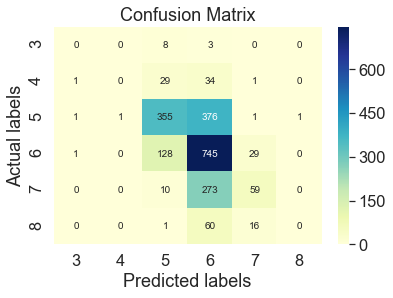

In [94]:
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd', cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['3', '4','5','6','7','8','9']); ax.yaxis.set_ticklabels(['3', '4','5','6','7','8','9']);

## Polynomial Kernel for White Wine

In [95]:
wine = pd.read_csv("winequalityN-white.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [96]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

#X,y

In [97]:
#Splitting the dataset as 2/3 of training and 1/3 of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3262, 11)
(1608, 11)
(3262,)
(1608,)


In [98]:
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[ 1.23716224  2.23080394  0.21406023 ... -0.64949443  0.39680672
  -0.66143178]
 [-0.065798   -0.48713097 -0.11303403 ...  0.6900673   0.48579837
   1.60308146]
 [-0.65805266  0.09528365 -0.35835473 ... -0.11366974 -1.11605129
   1.84570788]
 ...
 [ 1.11871131  1.45425111  1.27711659 ... -0.314604   -1.20504294
   0.63257578]
 [-0.53960173 -0.97247649 -0.44012829 ...  0.42215495 -1.20504294
  -0.014428  ]
 [-0.18424893  2.13373483  0.37760736 ...  0.89100156  0.48579837
  -0.74230726]]


In [99]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transofmation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
#print(y_train)
#print(y_test)
#print(y_test.shape)
#print(y_train.shape)

In [100]:
#fitting the model
model = svm.SVC( kernel='poly')
model.fit(X_train, y_train)

C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [101]:
#finding the predicted values
y_pred = model.predict(X_test)
#print(y_pred)
#print(y_test)

In [102]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

rms = sqrt(mean_squared_error(y_test, y_pred)) #root mean square error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
print(rms)
print(mae)

[[  0   3   4   1   0   0   0]
 [  0   5  20  22   0   0   0]
 [  0   8 181 294   2   0   0]
 [  0   1  75 607  19   1   0]
 [  0   0   7 245  41   0   0]
 [  0   0   0  63   7   0   0]
 [  0   0   0   2   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.29      0.11      0.16        47
           5       0.63      0.37      0.47       485
           6       0.49      0.86      0.63       703
           7       0.59      0.14      0.23       293
           8       0.00      0.00      0.00        70
           9       0.00      0.00      0.00         2

   micro avg       0.52      0.52      0.52      1608
   macro avg       0.29      0.21      0.21      1608
weighted avg       0.52      0.52      0.46      1608

0.5186567164179104
0.8263388051492695
0.5472636815920398


C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [103]:
#print(model.support_vectors_) #support vectors
#print(model.support_) #support vector indices
#print(model.support_vectors_.shape)
print(model.n_support_) # number of support vectors for each classes

[  12  110  889 1258  579  104    3]


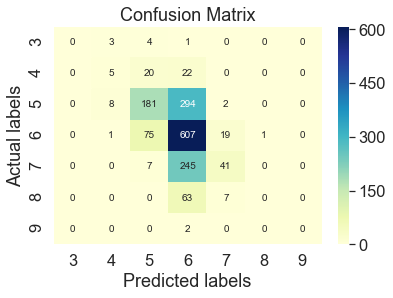

In [104]:
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd', cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['3', '4','5','6','7','8','9']); ax.yaxis.set_ticklabels(['3', '4','5','6','7','8','9']);

## Polynomial Kernel for Red Wine

In [105]:
wine = pd.read_csv("winequalityN-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [106]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

#X,y

In [107]:
#Splitting the dataset as 2/3 of training and 1/3 of testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)


In [108]:
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train)

In [109]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transofmation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
#print(y_train)
#print(y_test)
#print(y_test.shape)
#print(y_train.shape)

In [110]:
#fitting the model
model = svm.SVC(kernel='poly')
model.fit(X_train, y_train)

C:\Users\PackardBELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [111]:
#finding the predicted values
y_pred = model.predict(X_test)
#print(y_pred)
#print(y_test)

In [112]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

rms = sqrt(mean_squared_error(y_test, y_pred)) #root mean square error
mae = mean_absolute_error(y_test, y_pred) #mean absolute error
print(rms)
print(mae)

[[  0   0   4   0   0   0]
 [  0   0   8   5   1   0]
 [  1   1 180  36   2   0]
 [  0   1  94 117   5   1]
 [  0   0   7  44  15   0]
 [  0   0   0   4   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.61      0.82      0.70       220
           6       0.57      0.54      0.55       218
           7       0.65      0.23      0.34        66
           8       0.00      0.00      0.00         4

   micro avg       0.59      0.59      0.59       526
   macro avg       0.31      0.26      0.27       526
weighted avg       0.57      0.59      0.56       526

0.5931558935361216
0.7514245027079979
0.45817490494296575


In [113]:
#print(model.support_vectors_) #support vectors
#print(model.support_) #support vector indices
#print(model.support_vectors_.shape)
print(model.n_support_) # number of support vectors for each classes

[  6  38 365 393 130  14]


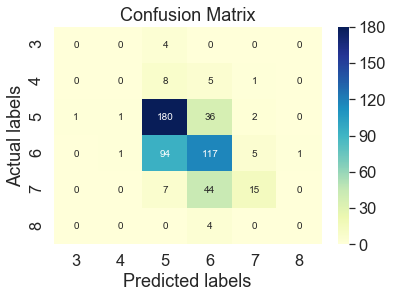

In [114]:
ax = plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd', cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['3', '4','5','6','7','8','9']); ax.yaxis.set_ticklabels(['3', '4','5','6','7','8','9']);

# Comparing accuracy score for each dataset and kernel functions

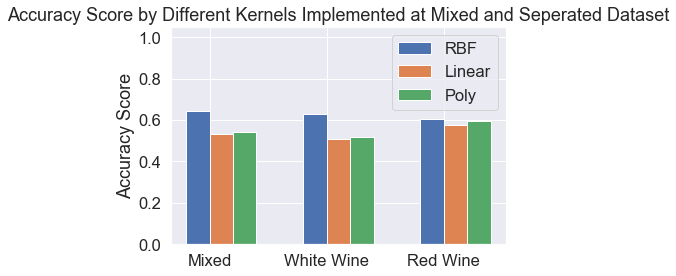

In [116]:
labels = ['Mixed', 'White Wine', 'Red Wine']
RBF = [0.6418, 0.627, 0.603]
Linear = [0.535, 0.509, 0.578]
Poly = [0.5433, 0.5186, 0.5931]

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, RBF, width, label='RBF')
rects2 = ax.bar(x + width/2, Linear, width, label='Linear')
rects3 = ax.bar(x + (1.5*width), Poly, width, label='Poly')

#Defining labels, axes and title for the plot
ax.set_ylabel('Accuracy Score')
ax.set_title('Accuracy Score by Different Kernels Implemented at Mixed and Seperated Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.plot(0,1)
plt.show()